# Анализ функций и их частотных характеристик  
Известно, что максимальная восстановимая частота функции определяется теоремой Найквиста и составляет менее половины шага дискретизации. Продемонстрируем это ниже на небольшом примере.  
Для начала подготовим среду и импортируем модули.

In [1]:
import sys
sys.path.append(r'C:\Users\Kell\PycharmProjects\ExpData')

from pylab import frange

%matplotlib inline

import grapher
import math

Далее зададим простую синусоиду с амплитудой = 100 и частотой, равной 57 герц. Шаг дискретизации выставим в 1/1000.

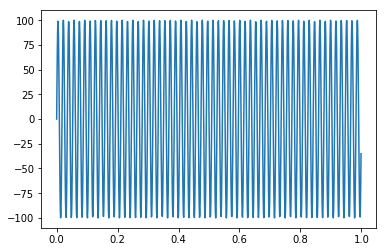

In [2]:
def sinFunc(A0, f0, dt):
	return lambda t: A0 * math.sin(2*math.pi*f0*dt*t)

f1 = sinFunc(100, 57, 0.001)
sinList = [f1(t) for t in range(0, 1000)]

grapher.init()
grapher.set_subplot(1,
                    x_arr=frange(0, 0.999, 0.001), y_arr=sinList,
                    subplot_x_number=1, subplot_y_number=1)

Как можно заметить, график функции корректно отображается и ее востановление не составит труда.  
Однако, теперь повысим частоту до 570 Герц, что превышает половину шага дискретизации (1000 / 2 = 500).

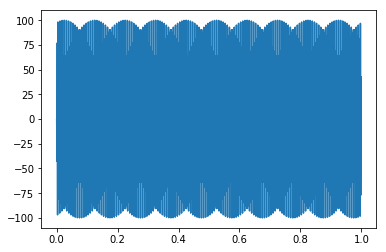

In [3]:
def sinFunc(A0, f0, dt):
	return lambda t: A0 * math.sin(2*math.pi*f0*dt*t)

f1 = sinFunc(100, 570, 0.001)
sinList = [f1(t) for t in range(0, 1000)]

grapher.set_subplot(1,
                    x_arr=frange(0, 0.999, 0.001), y_arr=sinList,
                    subplot_x_number=1, subplot_y_number=1)

Как можно заметить, на графике появилось заметное "биение". Данное "биение", или "пульсация" - это невосстановимая часть сигнала, которая монотонно присутствует в функции и появляется благодаря тому, что частоты дискретизации недостаточно для правильного восприятия данной части сигнала.  
Еще более трудной обработка сигнала становится, если наша основная частота зашумлена побочными.

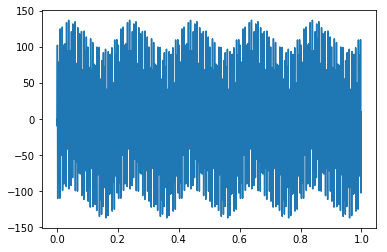

In [4]:
f1 = sinFunc(20, 5, 0.001)
f2 = sinFunc(100, 10*57, 0.001)
f3 = sinFunc(35, 190, 0.001)
sinList = [f1(t) + f2(t) + f3(t) for t in range(0, 1000)]

grapher.set_subplot(1, x_arr=frange(0, 0.999, 0.001), y_arr=sinList, subplot_x_number=1, subplot_y_number=1)
grapher.show()

В качестве заключительной иллюстрации приведем пример типичной записи сигнала, осложненного дополнительными функциями и сдвигом, а также с включениями шумов в случайных местах.

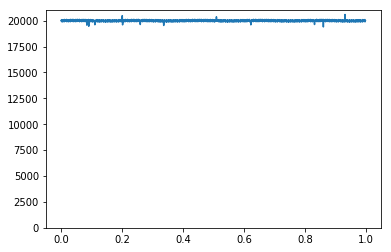

In [5]:
import prng

r = prng.PRNG()

def spike(chance, sigma):
	return sigma * 10 * (-1 if r.next() < 0.5 else 1) if r.next() < chance else 0

def shift(c):
	return c

f1 = sinFunc(20, 5, 0.001)
f2 = sinFunc(100, 10*57, 0.001)
f3 = sinFunc(35, 190, 0.001)

sinList = [f1(t) + f2(t) + f3(t) + spike(0.01, 50) + shift(20000) for t in range(0, 1000)]



grapher.set_subplot(1,
                    x_arr=frange(0, 0.999, 0.001), y_arr=sinList,
                    subplot_x_number=1, subplot_y_number=1,
                    ymin=0, ymax=21000)


Для обработки таких сигналов необходимо очищать данные и приводить их к требуемому виду.